In [3]:
import os
import pickle

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [ ]:
path = ""

bayarea_sub_file = os.path.join(path, "submissions", "bayarea_2020-07-01_2022-12-31", "bayarea_subs.csv")
california_sub_file = os.path.join(path, "submissions", "California_2020-07-01_2022-12-31", "California_subs.csv")
collapse_sub_file = os.path.join(path, "submissions", "collapse_2020-07-01_2022-12-31", "collapse_subs.csv")
news_sub_file = os.path.join(path, "submissions", "news_2020-07-01_2022-12-31", "news_subs.csv")
politics_sub_file = os.path.join(path, "submissions", "politics_2020-07-01_2022-12-31", "politics_subs.csv")
askreddit_sub_file = os.path.join(path, "submissions", "AskReddit_2020-07-01_2022-12-31", "AskReddit_subs.csv")

In [5]:
bayarea_sub_df = pd.read_csv(bayarea_sub_file)
california_sub_df = pd.read_csv(california_sub_file)
collapse_sub_df = pd.read_csv(collapse_sub_file)
news_sub_df = pd.read_csv(news_sub_file)
politics_sub_df = pd.read_csv(politics_sub_file)
askreddit_sub_df = pd.read_csv(askreddit_sub_file)

In [6]:
len(bayarea_sub_df), len(california_sub_df), len(collapse_sub_df), len(news_sub_df), len(politics_sub_df), len(askreddit_sub_df)

(184, 149, 2430, 391, 501, 2738)

In [12]:
subs_to_include = pickle.load(open(os.path.join(path, "to_include", "subs_to_include.pkl"), "rb"))
one_timer_subs = pickle.load(open(os.path.join(path, "to_include", "one_timer_subs.pkl"), "rb"))
bots_subs = pickle.load(open(os.path.join(path, "to_include", "bots_subs.pkl"), "rb"))

redditors_to_include = pickle.load(open(os.path.join(path, "to_include", "users_to_include.pkl"), "rb"))
one_timers = pickle.load(open(os.path.join(path, "to_include", "one_timers.pkl"), "rb"))
one_timer_subs_authors = pickle.load(open(os.path.join(path, "to_include", "one_timer_subs_authors.pkl"), "rb"))

# t2_onl9u PoliticsModeratorBot
# t2_6l4z3 AutoModerator
bots = {"t2_onl9u", "t2_6l4z3"}

In [13]:
# we need to remove the bots from the list of users to include
to_remove = bots.union(one_timers)
to_remove = to_remove.union(one_timer_subs_authors)
redditors_to_include = {x for x in redditors_to_include if x not in to_remove}

In [14]:
len(redditors_to_include)

55604

In [15]:
bots_subs

{'t3_itl7u2', 't3_p1r1yz'}

In [16]:
subs_to_include = {x for x in subs_to_include if (x not in one_timer_subs) and (x not in bots_subs)}
len(subs_to_include)

6251

In [10]:
subs_to_include_no_prefix = [sub[3:] for sub in subs_to_include]

In [102]:
# let's store the definitive sets of users and submissions to include
# pickle.dump(redditors_to_include, open(os.path.join(path, "to_include", "final_users_to_include.pkl"), "wb"))
# pickle.dump(subs_to_include, open(os.path.join(path, "to_include", "final_subs_to_include.pkl"), "wb"))

In [11]:
# filter out the subs and redditors to ignore
bayarea_sub_df = bayarea_sub_df[bayarea_sub_df["sub_id"].isin(subs_to_include_no_prefix)]
california_sub_df = california_sub_df[california_sub_df["sub_id"].isin(subs_to_include_no_prefix)]
collapse_sub_df = collapse_sub_df[collapse_sub_df["sub_id"].isin(subs_to_include_no_prefix)]
news_sub_df = news_sub_df[news_sub_df["sub_id"].isin(subs_to_include_no_prefix)]
politics_sub_df = politics_sub_df[politics_sub_df["sub_id"].isin(subs_to_include_no_prefix)]
askreddit_sub_df = askreddit_sub_df[askreddit_sub_df["sub_id"].isin(subs_to_include_no_prefix)]

In [12]:
len(bayarea_sub_df), len(california_sub_df), len(collapse_sub_df), len(news_sub_df), len(politics_sub_df), len(askreddit_sub_df)

(181, 148, 2429, 385, 490, 2618)

### Number of submissions per subreddit

<BarContainer object of 6 artists>

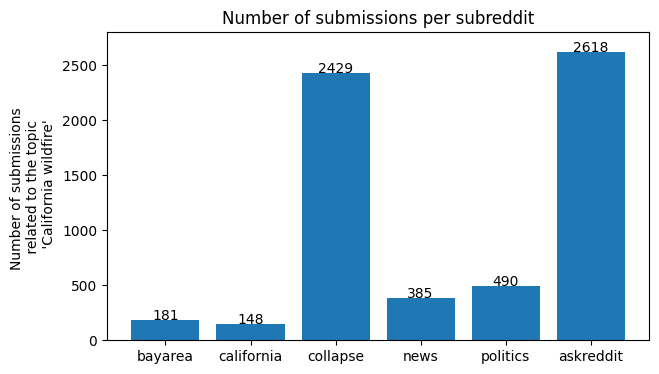

In [13]:
sub_counts = (bayarea_sub_df.shape[0], california_sub_df.shape[0], collapse_sub_df.shape[0], news_sub_df.shape[0], politics_sub_df.shape[0], askreddit_sub_df.shape[0])

# set the size of the figure
plt.figure(figsize=(7, 4))

plt.title("Number of submissions per subreddit")
plt.ylabel("Number of submissions \n related to the topic \n 'California wildfire'")

# set ylim
plt.ylim(0, 2800)

# show the actual values on the bars
for i, v in enumerate(sub_counts):
    plt.text(i, v, str(v), color='black', ha='center')

plt.bar(["bayarea", "california", "collapse", "news", "politics", "askreddit"], sub_counts)


In [14]:
sum(sub_counts)

6251

### Evaluating the distribution of the number of comments per submission within a subreddit

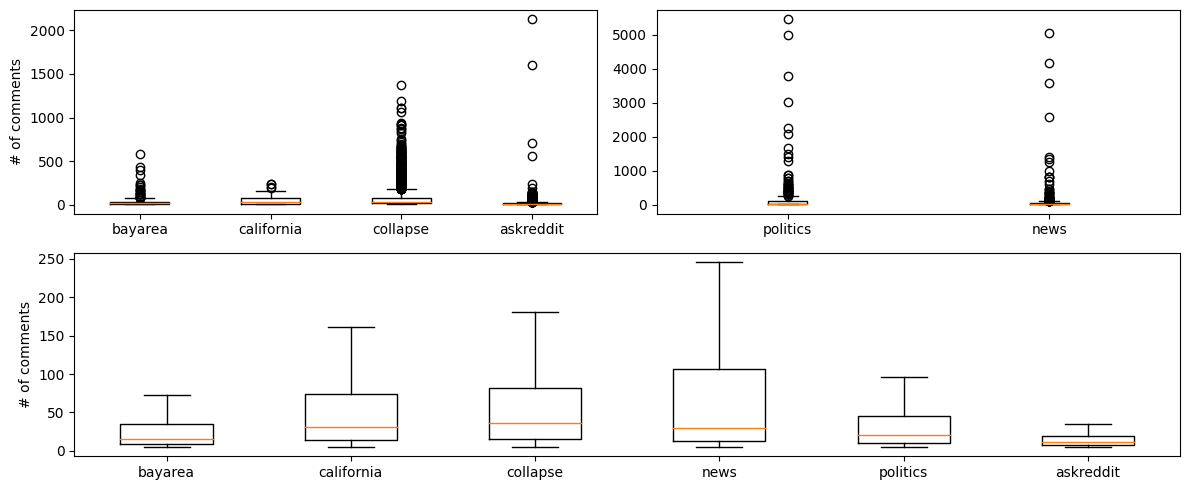

In [76]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# data to plot
data = [bayarea_sub_df['num_comments'], california_sub_df['num_comments'], collapse_sub_df['num_comments'], askreddit_sub_df['num_comments']]#, news_sub_df['num_comments']]
all_data = [bayarea_sub_df['num_comments'], california_sub_df['num_comments'], collapse_sub_df['num_comments'], news_sub_df['num_comments'], politics_sub_df['num_comments'], askreddit_sub_df['num_comments']]

fig = plt.figure(figsize=(12, 5))
gs = fig.add_gridspec(2, 2)
# figure, axis = plt.subplots(2, 2, figsize=(12, 5))

# # Creating plot
ax1 = fig.add_subplot(gs[0, 0])
ax1.boxplot(data)
# axis[0,0].boxplot(data)

ax2 = fig.add_subplot(gs[0, 1])
ax2.boxplot([news_sub_df['num_comments'], politics_sub_df['num_comments']])
# axis[0,1].boxplot([politics_sub_df['num_comments'], news_sub_df['num_comments']])

ax3 = fig.add_subplot(gs[1, :])
ax3.boxplot(all_data, showfliers=False)

# # adding labels
ax1.set_xticklabels(['bayarea', 'california', 'collapse', 'askreddit'])
ax2.set_xticklabels(['politics', 'news'])
ax3.set_xticklabels(['bayarea', 'california', 'collapse', 'news', 'politics', 'askreddit'])

# axis[0,0].set_xticklabels(['bayarea', 'california', 'collapse', 'askreddit'])
# axis[0,1].set_xticklabels(['politics', 'news'])

ax1.set_ylabel('# of comments')
ax3.set_ylabel('# of comments')
# axis[0,0].set_ylabel('Number of comments')
 
# show plot
plt.show()


In [41]:
# in numbers
data_df = pd.DataFrame(
    data={
        'bayarea': bayarea_sub_df['num_comments'], 
        'california': california_sub_df['num_comments'], 
        'collapse': collapse_sub_df['num_comments'], 
        'news': news_sub_df['num_comments'],
        'politics': politics_sub_df['num_comments'],
        'askreddit': askreddit_sub_df['num_comments']
    }
)

In [78]:
data_df.describe()

,bayarea,california,collapse,news,politics,askreddit
count,181.000000,148.000000,2429.000000,385.000000,490.000000,2618.000000
mean,42.779006,49.682432,80.154385,157.166234,89.226531,18.842246
std,76.557138,47.716430,129.644758,504.472092,379.415932,56.853329
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,9.000000,14.000000,16.000000,13.000000,10.000000,8.000000
50%,16.000000,31.000000,36.000000,30.000000,21.000000,12.000000
75%,35.000000,73.500000,82.000000,107.000000,44.750000,19.000000
max,587.000000,242.000000,1377.000000,5463.000000,5055.000000,2125.000000


In [43]:
# get the total number of comments per subreddit
total_comments = data_df.sum()
total_comments

bayarea         7743.0
california      7353.0
collapse      194695.0
news           60509.0
politics       43721.0
askreddit      49329.0
dtype: float64

In [44]:
total_comments.sum()

363350.0

### Evaluating user contribution

In [15]:
thread_dir = os.path.join(path, "threads")

# subreddit_dirs
subreddit_dirs = os.listdir(thread_dir)

In [16]:
subreddit_dirs

['news_2020-07-01_2022-12-31',
 'bayarea_2020-07-01_2022-12-31',
 'politics_2020-07-01_2022-12-31',
 'AskReddit_2020-07-01_2022-12-31',
 'collapse_2020-07-01_2022-12-31',
 'California_2020-07-01_2022-12-31']

In [17]:
# user-related data
# here we start adding users from the submissions
bayarea_reddittors = set(bayarea_sub_df['author_id'].unique())
california_reddittors = set(california_sub_df['author_id'].unique())
collapse_reddittors = set(collapse_sub_df['author_id'].unique())
news_reddittors = set(news_sub_df['author_id'].unique())
politics_reddittors = set(politics_sub_df['author_id'].unique())
askreddit_reddittors = set(askreddit_sub_df['author_id'].unique())

reddittors_data = {}

In [18]:
# convinience structure for bot detection
# {redditor_id => {subreddit => [submission_ids]}}
redditors_data_ids = {}

In [19]:
# id => name
reddittors_ids_to_names = {}

In [20]:
# here we populate the reddittors_data dictionary
# based on submission data
for subreddit in subreddit_dirs:
    subreddit_name = subreddit.split("_")[0].lower()
    print("Working on", subreddit_name)

    _df = eval(subreddit_name + "_sub_df")

    # get unique reddittors
    reddittors = set(_df['author_id'])
    # count how many submissions each redditor made
    redditor_comment_counts = _df['author_id'].value_counts()

    # here we save the users' ids and their name
    _reddittors_ids_to_names = dict(zip(_df['author_id'], _df['author_name']))
    # merge the two dictionaries
    reddittors_ids_to_names = {**reddittors_ids_to_names, **_reddittors_ids_to_names}

    for user in reddittors:
        #print(redditor_comment_counts[user])
        if pd.isnull(user):
            continue

        if user not in reddittors_data:
            reddittors_data[user] = {subreddit_name: [redditor_comment_counts[user]]}
            redditors_data_ids[user] = {subreddit_name: [_df[_df['author_id'] == user]['sub_id'].values[0]]}
        else:
            if subreddit_name not in reddittors_data[user]:
                reddittors_data[user][subreddit_name] = [redditor_comment_counts[user]]
                redditors_data_ids[user][subreddit_name] = [_df[_df['author_id'] == user]['sub_id'].values[0]]
            else:
                reddittors_data[user][subreddit_name].append(redditor_comment_counts[user])
                redditors_data_ids[user][subreddit_name].append(_df[_df['author_id'] == user]['sub_id'].values[0])
    

Working on news
Working on bayarea
Working on politics
Working on askreddit
Working on collapse
Working on california


In [21]:
len(reddittors_data), len(redditors_data_ids), len(reddittors_ids_to_names)

(3783, 3783, 3784)

In [22]:
set(reddittors_ids_to_names.keys()) - set(reddittors_data.keys())  

{nan}

In [23]:
reddittors_data

{'t2_413jecg7': {'news': [1]},
 't2_i8so3': {'news': [2]},
 't2_9tqr11vu': {'news': [1]},
 't2_bf327jui': {'news': [1]},
 't2_2cggcmj7': {'news': [1]},
 't2_b63sc': {'news': [1]},
 't2_11s1vi': {'news': [1]},
 't2_635mdrfo': {'news': [1], 'politics': [1]},
 't2_498j353x': {'news': [1]},
 't2_67ypn': {'news': [1]},
 't2_fu6ktvm7': {'news': [1]},
 't2_13zqyndz': {'news': [1]},
 't2_2stz': {'news': [1]},
 't2_qv3rd2y': {'news': [1]},
 't2_8jg79eu4': {'news': [1]},
 't2_13vkqu': {'news': [1]},
 't2_10jafb': {'news': [1]},
 't2_5ezfam2g': {'news': [1], 'politics': [1]},
 't2_bwvliwl': {'news': [2], 'politics': [1]},
 't2_l5pahsm': {'news': [2]},
 't2_cc1c2': {'news': [1]},
 't2_j9nc0': {'news': [1]},
 't2_88fawpgz': {'news': [1]},
 't2_92mo': {'news': [1]},
 't2_bs5wy': {'news': [2], 'politics': [1]},
 't2_7o0bv2fo': {'news': [1]},
 't2_58900d68': {'news': [2]},
 't2_ssgvgx4': {'news': [1]},
 't2_q41gi': {'news': [1]},
 't2_4d42du8r': {'news': [1]},
 't2_14cw76': {'news': [1]},
 't2_rdceq':

In [ ]:
# store reddittors_data as pickle
# with open("submitters_data.pickle", "wb") as f:
#     pickle.dump(redditors_data_ids, f)

In [88]:
redditors_data_ids;

In [24]:
# here we add users from conversational threads
for subreddit in subreddit_dirs:
    subreddit_name = subreddit.split("_")[0].lower()

    print("Working on", subreddit_name)

    subreddit_path = os.path.join(thread_dir, subreddit)
    thread_files = os.listdir(subreddit_path)

    for thread_file in thread_files:
        if thread_file not in subs_to_include_no_prefix:
            continue

        thread_file_path = os.path.join(subreddit_path, thread_file, f"{thread_file}.csv")
        try:
            thread_df = pd.read_csv(thread_file_path)
        except pd.errors.EmptyDataError:
            print("Empty file:", thread_file_path)
            continue

        if 'author_id' not in thread_df:
            print(f"Problems with {thread_file_path}")
            continue
       
        # get unique reddittors
        reddittors = set(thread_df['author_id'])
        # add them to the proper set
        eval(subreddit_name + "_reddittors").update(reddittors)

        # count how many comments each redditor made
        redditor_comment_counts = thread_df['author_id'].value_counts()

        # here we save the users' ids and their name
        _reddittors_ids_to_names = dict(zip(thread_df['author_id'], thread_df['author_name']))
        # merge the two dictionaries
        reddittors_ids_to_names = {**reddittors_ids_to_names, **_reddittors_ids_to_names}

        for user in reddittors:
            #print(redditor_comment_counts[user])
            if user not in reddittors_data:
                reddittors_data[user] = {subreddit_name: [redditor_comment_counts[user]]}
                redditors_data_ids[user] = {subreddit_name: [thread_file]}
            else:
                if subreddit_name not in reddittors_data[user]:
                    reddittors_data[user][subreddit_name] = [redditor_comment_counts[user]]
                    redditors_data_ids[user][subreddit_name] = [thread_file]
                else:
                    reddittors_data[user][subreddit_name].append(redditor_comment_counts[user])
                    redditors_data_ids[user][subreddit_name].append(thread_file)      

Working on news
Working on bayarea
Working on politics
Working on askreddit
Working on collapse
Working on california


In [25]:
len(reddittors_data), len(redditors_data_ids), len(reddittors_ids_to_names)

(100362, 100362, 100363)

In [142]:
redditors_data_ids;

In [ ]:
# save the reddittors_data dictionary with pickle
# with open("reddittors_data.pickle", "wb") as f:
#     pickle.dump(reddittors_data, f)

# # save the reddittors_ids_to_names dictionary with pickle
# with open("reddittors_ids_to_names.pickle", "wb") as f:
#     pickle.dump(reddittors_ids_to_names, f)

# # save the redditors_data_ids dictionary with pickle
# with open("redditors_data_ids.pickle", "wb") as f:
#     pickle.dump(redditors_data_ids, f)


In [ ]:
# we only consider a subset of users
for user in reddittors_data.copy():
    if user not in redditors_to_include:
        reddittors_data.pop(user)

        # remove the user from the other sets
        bayarea_reddittors.discard(user)
        california_reddittors.discard(user)
        collapse_reddittors.discard(user)
        news_reddittors.discard(user)
        politics_reddittors.discard(user)
        askreddit_reddittors.discard(user)

# we should also remove "nan"

In [38]:
len(reddittors_data), len(bayarea_reddittors), len(california_reddittors), len(collapse_reddittors), len(news_reddittors), len(politics_reddittors), len(askreddit_reddittors)

(54923, 1896, 1744, 21533, 14160, 10408, 10953)

In [65]:
# merge the sets of redditors
tmp = news_reddittors.union(askreddit_reddittors).union(politics_reddittors)
len(tmp)

32861

In [32]:
reddittors_data

{'t2_413jecg7': {'news': [1]},
 't2_i8so3': {'news': [2]},
 't2_9tqr11vu': {'news': [1]},
 't2_bf327jui': {'news': [1]},
 't2_2cggcmj7': {'news': [1]},
 't2_b63sc': {'news': [1]},
 't2_11s1vi': {'news': [1]},
 't2_635mdrfo': {'news': [1, 1], 'politics': [1, 6]},
 't2_498j353x': {'news': [1]},
 't2_67ypn': {'news': [1]},
 't2_fu6ktvm7': {'news': [1]},
 't2_13zqyndz': {'news': [1]},
 't2_2stz': {'news': [1, 4]},
 't2_qv3rd2y': {'news': [1]},
 't2_8jg79eu4': {'news': [1]},
 't2_13vkqu': {'news': [1, 1]},
 't2_10jafb': {'news': [1]},
 't2_5ezfam2g': {'news': [1, 1], 'politics': [1, 1, 1, 1]},
 't2_bwvliwl': {'news': [2], 'politics': [1]},
 't2_l5pahsm': {'news': [2]},
 't2_cc1c2': {'news': [1]},
 't2_j9nc0': {'news': [1]},
 't2_88fawpgz': {'news': [1, 1]},
 't2_92mo': {'news': [1]},
 't2_bs5wy': {'news': [2, 1], 'politics': [1]},
 't2_7o0bv2fo': {'news': [1, 1]},
 't2_58900d68': {'news': [2, 1], 'collapse': [1, 1, 8]},
 't2_ssgvgx4': {'news': [1, 1, 1, 6, 1, 3, 1, 1, 1, 1, 1, 3, 1, 2]},
 '

In [ ]:
# # from reddittors_data count all users who have commented in the subreddit "bayarea" - CHECK
# subreddit_tmp = "askreddit"
# tmp = {user: data[subreddit_tmp] for user, data in reddittors_data.items() if subreddit_tmp in data}
# len(tmp)

10952

In [ ]:
# pickle.dump(list(reddittors_data.keys()), open(os.path.join(path, "to_include", "final_users_to_include.pkl"), "wb"))

### Unique users

<BarContainer object of 6 artists>

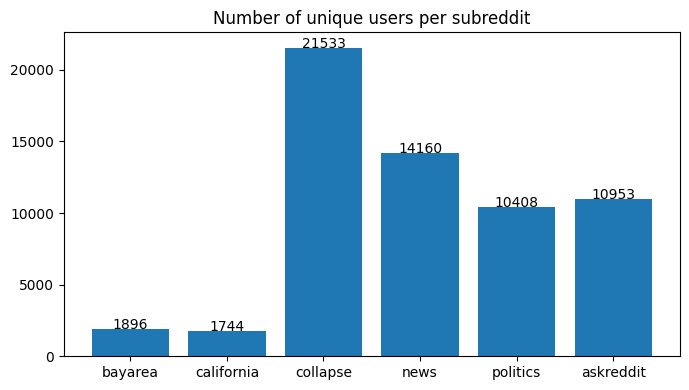

In [145]:
# plot the number of unique users per subreddit
reddittor_counts = (len(bayarea_reddittors), len(california_reddittors), len(collapse_reddittors), len(news_reddittors), len(politics_reddittors), len(askreddit_reddittors))

# set the size of the figure
plt.figure(figsize=(7, 4))

plt.title("Number of unique users per subreddit")

#plt.ylim(0, 27000)

# show the actual values on the bars
for i, v in enumerate(reddittor_counts):
    plt.text(i, v, str(v), color='black', ha='center')

plt.bar(["bayarea", "california", "collapse", "news", "politics", "askreddit"], reddittor_counts)



In [146]:
#it is correct that the sum of the number of unique users in each subreddit
#differs from the
#total number of unique users in the dataset
sum(reddittor_counts)

60694

### Subreddits stats
Distribution of the number of subreddits each user has contributed to.

In [ ]:
subreddits_per_user = {}
cnt_subreddits_per_user = {}
# tmp = {}

In [ ]:
for k, v in reddittors_data.items():
    #print(k, v)

    subreddits = frozenset(v.keys())
    n_subreddits = len(subreddits)

    # saving how many users have commented in how many subreddits
    cnt_subreddits_per_user[n_subreddits] = cnt_subreddits_per_user.get(n_subreddits, 0) + 1

    # saving combinations of subreddits users have commented
    subreddits_per_user[subreddits] = subreddits_per_user.get(subreddits, 0) + 1

    # count how manu users contributed to 
    # bayarea, california, collapse, news, politics, askreddit
    # for subreddit in subreddits:
    #     tmp[subreddit] = tmp.get(subreddit, 0) + 1

In [ ]:
# tmp
# everything works

{'news': 14159,
 'politics': 10407,
 'collapse': 21532,
 'california': 1743,
 'askreddit': 10952,
 'bayarea': 1895}

In [ ]:
# sort subreddits_per_user based on values
sorted_subreddits_per_user = {k: v for k, v in sorted(subreddits_per_user.items(), key=lambda item: item[1], reverse=True)}
sorted_subreddits_per_user

{frozenset({'collapse'}): 19226,
 frozenset({'news'}): 10569,
 frozenset({'askreddit'}): 9667,
 frozenset({'politics'}): 7638,
 frozenset({'news', 'politics'}): 1492,
 frozenset({'bayarea'}): 1432,
 frozenset({'california'}): 1113,
 frozenset({'collapse', 'news'}): 966,
 frozenset({'collapse', 'politics'}): 565,
 frozenset({'askreddit', 'news'}): 465,
 frozenset({'askreddit', 'collapse'}): 365,
 frozenset({'askreddit', 'politics'}): 259,
 frozenset({'california', 'news'}): 172,
 frozenset({'bayarea', 'california'}): 151,
 frozenset({'collapse', 'news', 'politics'}): 137,
 frozenset({'bayarea', 'news'}): 111,
 frozenset({'california', 'collapse'}): 88,
 frozenset({'askreddit', 'news', 'politics'}): 70,
 frozenset({'california', 'politics'}): 66,
 frozenset({'bayarea', 'politics'}): 50,
 frozenset({'bayarea', 'collapse'}): 47,
 frozenset({'askreddit', 'collapse', 'news'}): 38,
 frozenset({'california', 'news', 'politics'}): 29,
 frozenset({'askreddit', 'collapse', 'politics'}): 25,
 froz

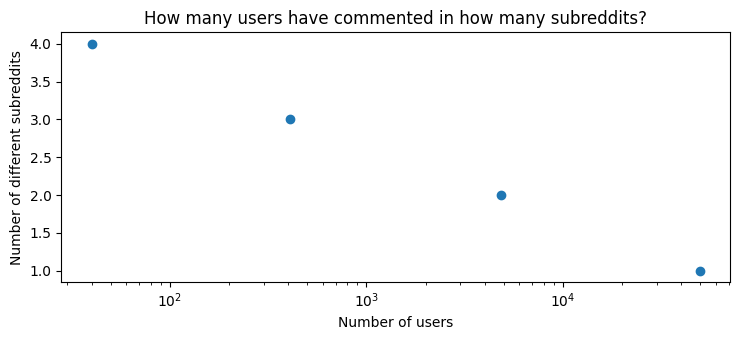

In [150]:
# scatter plot cnt_subreddits_per_user
plt.scatter(cnt_subreddits_per_user.values(),cnt_subreddits_per_user.keys())

# log scale x axis
plt.xscale('log')

plt.ylabel('Number of different subreddits')
plt.xlabel('Number of users')

plt.title("How many users have commented in how many subreddits?");

### Submissions and comments' stats

In [151]:
# given a subreddit,
# we want to know how many users have commented on
# how many submissions in that subreddit  
cnt_subs_per_users = {}
# we also want to know how many comments each user has made
cnt_comms_per_users = {}

In [152]:
for k, v in reddittors_data.items():
    #print(k, v)

    for subreddit, counts in v.items():
        # number of submissions per subreddit
        n_subs = 0
        # number of comments per subreddit
        n_comms = 0

        #print(subreddit, counts)
        n_subs += len(counts)
        n_comms += sum(counts)

        #print(n_subs, n_comms)

        # saving how many users have commented on how many submissions
        # saving how many comments each user has made within a subreddit
        if subreddit not in cnt_subs_per_users:
            cnt_subs_per_users[subreddit] = {n_subs : 1}
            cnt_comms_per_users[subreddit] = {n_comms : 1}
        else:
            cnt_subs_per_users[subreddit][n_subs] = cnt_subs_per_users[subreddit].get(n_subs, 0) + 1
            cnt_comms_per_users[subreddit][n_comms] = cnt_comms_per_users[subreddit].get(n_comms, 0) + 1

In [153]:
cnt_subs_per_users

{'askreddit': {2: 2893,
  1: 6535,
  4: 298,
  8: 44,
  3: 743,
  5: 145,
  6: 92,
  7: 76,
  11: 15,
  10: 23,
  17: 4,
  14: 12,
  13: 8,
  9: 24,
  21: 2,
  12: 10,
  26: 1,
  23: 3,
  22: 2,
  49: 1,
  16: 4,
  42: 1,
  15: 2,
  19: 4,
  29: 1,
  41: 1,
  31: 1,
  20: 3,
  24: 2,
  28: 1,
  25: 1},
 'collapse': {1: 8621,
  6: 559,
  27: 27,
  2: 4947,
  4: 1273,
  10: 210,
  5: 807,
  7: 475,
  12: 151,
  3: 2309,
  139: 1,
  15: 85,
  8: 360,
  17: 72,
  18: 61,
  67: 3,
  16: 97,
  9: 242,
  14: 121,
  25: 38,
  72: 4,
  35: 11,
  24: 35,
  51: 5,
  48: 12,
  83: 2,
  80: 3,
  34: 18,
  31: 27,
  142: 1,
  13: 119,
  32: 14,
  56: 6,
  73: 5,
  60: 2,
  22: 36,
  68: 3,
  37: 11,
  11: 185,
  40: 12,
  122: 1,
  538: 1,
  29: 31,
  26: 26,
  91: 1,
  21: 40,
  353: 1,
  42: 5,
  215: 1,
  87: 3,
  19: 58,
  28: 32,
  46: 9,
  30: 26,
  173: 3,
  103: 2,
  20: 53,
  38: 14,
  59: 6,
  88: 4,
  199: 1,
  39: 6,
  65: 3,
  53: 4,
  43: 8,
  128: 3,
  57: 6,
  45: 9,
  23: 35,
  93: 

In [154]:
cnt_comms_per_users

{'askreddit': {2: 3384,
  1: 3611,
  3: 1442,
  4: 765,
  5: 482,
  12: 71,
  8: 163,
  9: 100,
  6: 291,
  10: 92,
  11: 67,
  7: 222,
  60: 1,
  20: 11,
  21: 16,
  27: 6,
  13: 35,
  41: 2,
  15: 25,
  19: 10,
  14: 29,
  16: 24,
  25: 8,
  22: 4,
  31: 2,
  50: 1,
  26: 4,
  24: 7,
  18: 10,
  17: 16,
  23: 11,
  43: 2,
  33: 5,
  29: 3,
  40: 1,
  45: 1,
  32: 5,
  36: 1,
  28: 3,
  30: 4,
  39: 1,
  104: 1,
  147: 1,
  38: 2,
  37: 3,
  55: 1,
  34: 2,
  52: 1,
  42: 2,
  54: 1},
 'collapse': {1: 4793,
  3: 2654,
  6: 863,
  37: 30,
  2: 5131,
  12: 239,
  8: 487,
  11: 304,
  4: 1734,
  47: 23,
  15: 137,
  33: 30,
  7: 677,
  20: 89,
  289: 1,
  18: 104,
  13: 226,
  10: 326,
  19: 103,
  5: 1142,
  35: 35,
  16: 154,
  23: 84,
  25: 71,
  52: 25,
  108: 6,
  9: 431,
  21: 88,
  28: 47,
  30: 43,
  29: 39,
  43: 21,
  136: 2,
  17: 132,
  14: 186,
  49: 22,
  201: 3,
  79: 5,
  31: 29,
  87: 7,
  22: 83,
  237: 2,
  84: 5,
  123: 2,
  111: 3,
  73: 9,
  239: 1,
  119: 4,
  24: 

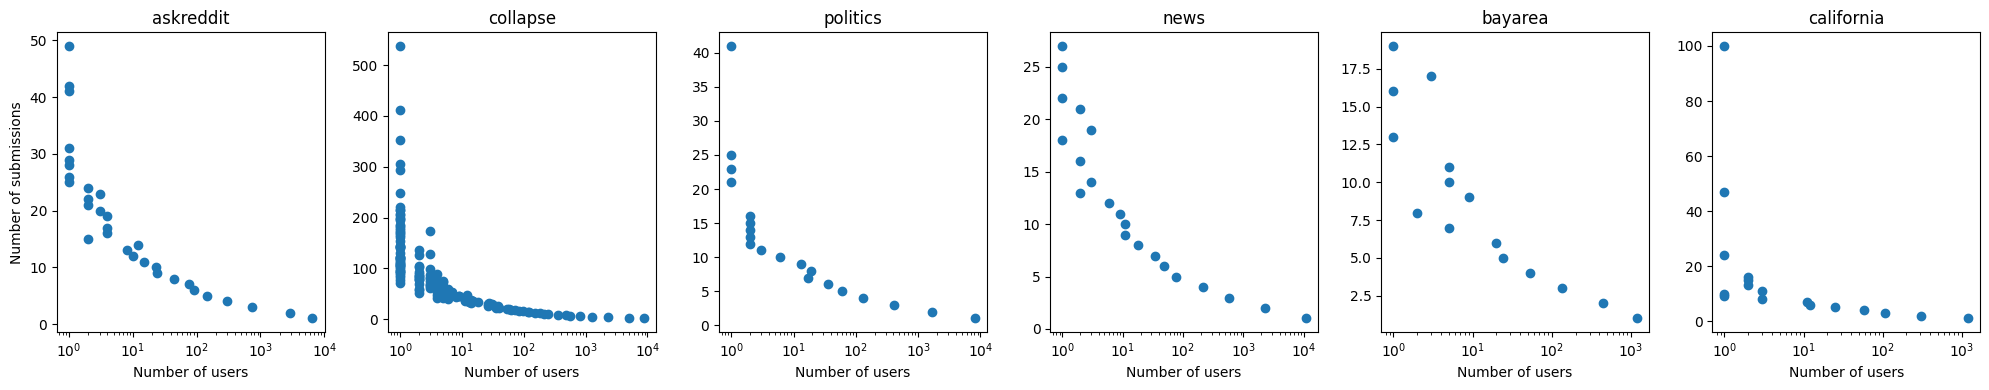

In [155]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

figure, axis = plt.subplots(1, len(cnt_subs_per_users), figsize=(20, 4))

keys = list(cnt_subs_per_users.keys())

for index, subreddit in enumerate(keys):
    #print(index, subreddit)
    axis[index].scatter(cnt_subs_per_users[subreddit].values(), cnt_subs_per_users[subreddit].keys())

    axis[index].set_xscale('log')

    index == 0 and axis[index].set_ylabel('Number of submissions')
    axis[index].set_xlabel('Number of users')
    axis[index].set_title(subreddit)

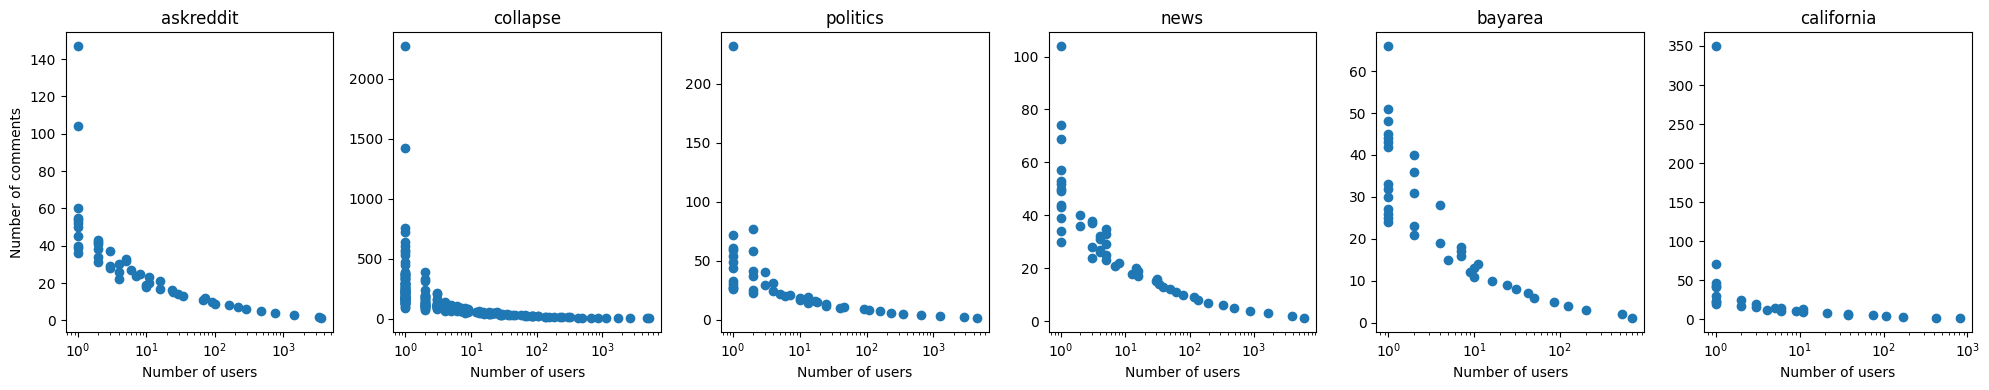

In [156]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

figure, axis = plt.subplots(1, len(cnt_subs_per_users), figsize=(20, 4))

keys = list(cnt_subs_per_users.keys())

for index, subreddit in enumerate(keys):
    #print(index, subreddit)
    axis[index].scatter(cnt_comms_per_users[subreddit].values(), cnt_comms_per_users[subreddit].keys())

    axis[index].set_xscale('log')

    index == 0 and axis[index].set_ylabel('Number of comments')
    axis[index].set_xlabel('Number of users')
    axis[index].set_title(subreddit)

#### Count comments across subreddits

In [157]:
n_comms_from_subs = \
    sum(askreddit_sub_df["num_comments"]) + \
    sum(collapse_sub_df["num_comments"]) + \
    sum(california_sub_df["num_comments"]) + \
    sum(bayarea_sub_df["num_comments"]) + \
    sum(news_sub_df["num_comments"]) + \
    sum(politics_sub_df["num_comments"])

In [158]:
n_comms_from_subs

363350

In [159]:
n_comms_from_data = sum([sum(comments_number) for k, v in reddittors_data.items() for subreddit, comments_number in v.items()])

In [160]:
n_comms_from_data

287798